batch - aka wsad; dane wprowadzamy w paczkach, żeby sieć efektywniej się uczyła; a nie tak na raz np 10000 danych 
wtedy dane po każdej takiej "paczce danych" są akutalizowane
na początku są wagi losowe i już po pierwszym batchu mamy aktualizację - czyli sieć jest już na coś nakierowana

za standardowy batch size uznajemy 32; czyli na raz do sieci wprowadzane są 32 wiersze (np. 32 osoby w titanicu)
tam pod epoch w liczeniu widzimy na ile paczek on podzielił dane i potem w x ms/step ile zajęło mu liczenie takiego jednego poszczególnego kroku (paczki)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
EPOCHS = 100

In [2]:
# Przygotowanie danych
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
#ile czasu zajmuje jeden krok dla poszczególnych wartości batch size?
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_images, test_labels))
    histories.append(history)

Ustawiona wielość zbioru: 8
Epoch 1/5
7500/7500 [==============================] - 10s 1ms/step - loss: 0.2103 - accuracy: 0.9380 - val_loss: 0.1102 - val_accuracy: 0.9659
Epoch 2/5
7500/7500 [==============================] - 9s 1ms/step - loss: 0.0925 - accuracy: 0.9718 - val_loss: 0.0800 - val_accuracy: 0.9755
Epoch 3/5
7500/7500 [==============================] - 9s 1ms/step - loss: 0.0636 - accuracy: 0.9801 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 4/5
7500/7500 [==============================] - 9s 1ms/step - loss: 0.0502 - accuracy: 0.9840 - val_loss: 0.0812 - val_accuracy: 0.9755
Epoch 5/5
7500/7500 [==============================] - 9s 1ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0950 - val_accuracy: 0.9753
Ustawiona wielość zbioru: 16
Epoch 1/5
3750/3750 [==============================] - 6s 1ms/step - loss: 0.2329 - accuracy: 0.9326 - val_loss: 0.1133 - val_accuracy: 0.9665
Epoch 2/5
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1010 - 

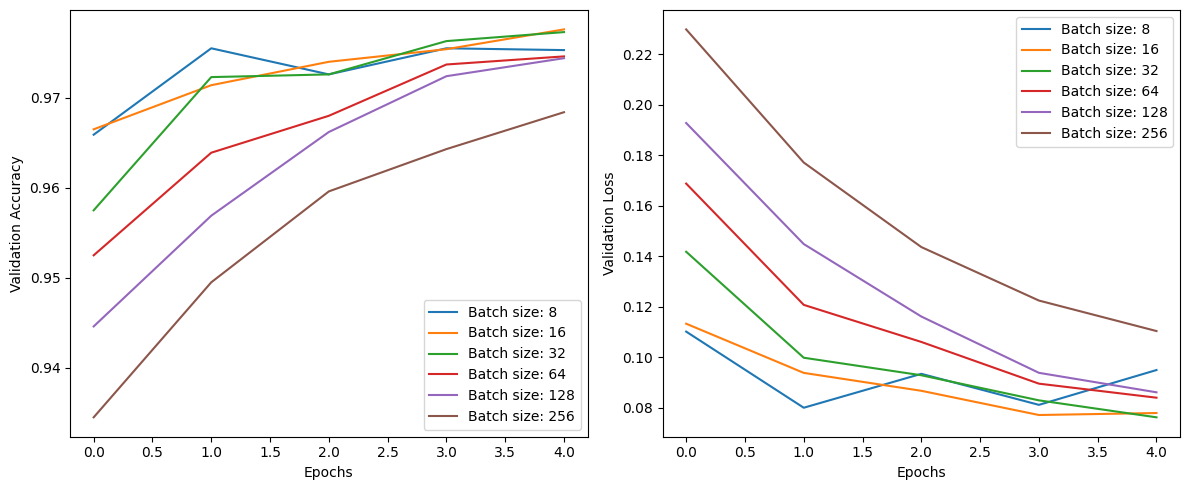

In [4]:
# Wygenerowanie wykresów
plt.figure(figsize=(12, 5))

# Dokładność
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Strata
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Im aktualizacji jest więcej (czyli im mniejszy jest batch size), tym więcej czasu zajmuje my policzenie - dlatego przy najmniejszej wielkości batcha zajmuje mu to najwięcej czasu 
7500 x 8 = 60 000 (stąd ta ilość paczek)

gdy rozmiar paczek jest duży on nie ma wystarczającej liczby aktualizacji, więc nie jest w stanie tak ładnie wypracować tych wartości

widać na wykresie, że trzy największe są wyraźnie gorsze, dlatego rezygnujemy z nich ostatecznie; dopiero teraz możemy zastosować sobie kryterium czasu do wyboru najlepszego wyboru batch size